# Classification

## Objectives

*   Fit and evaluate a classification model to predict if a treatment will be successful or not.


## Inputs

* outputs/datasets/collection/FertilityTreatmentData.csv.gz
* Instructions from the notebooks 02 and 04 on which variables to use for data cleaning and feature engineering.

## Outputs

* Train set (features and target)
* Test set (features and target)
* Data cleaning and Feature Engineering pipeline
* Modeling pipeline
* Feature importance plot


---

## Change working directory

Change the working directory from its current folder to its parent folder
* Access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/patriciahalley/Documents/Code_institute/git/ivf-success-predictor/jupyter_notebooks'

To make the parent of the current directory the new current directory:
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("A new current directory has been set")

A new current directory has been set


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/Users/patriciahalley/Documents/Code_institute/git/ivf-success-predictor'

---

## Load Data

In [4]:
import numpy as np
import pandas as pd

# Open dataset
df = pd.read_csv("outputs/datasets/cleaned/FertilityTreatmentDataCleaned.csv")
        
print(df.shape)
df.head(3)

(135695, 29)


,Patient age at treatment,Total number of previous IVF cycles,Total number of previous pregnancies - IVF and DI,Total number of previous live births - IVF or DI,Causes of infertility - tubal disease,Causes of infertility - ovulatory disorder,Causes of infertility - male factor,Causes of infertility - patient unexplained,Causes of infertility - endometriosis,Stimulation used,...,Frozen cycle,Fresh eggs collected,Total eggs mixed,Total embryos created,Embryos transferred,Total embryos thawed,Embryos transferred from eggs micro-injected,Date of embryo transfer,Live birth occurrence,Patient ethnicity
0,18-34,0,0,0,0,0,1,0,0,1,...,0,1-5,1-5,1-5,1e,0 - fresh cycle,1,5 - fresh,0,White
1,18-34,1,0,0,0,0,1,0,0,0,...,1,0 - frozen cycle,0 - frozen cycle,0 - frozen cycle,1,1-5,0,0 - frozen,0,White
2,40-42,0,0,0,0,0,0,1,0,1,...,0,1-5,1-5,1-5,1,0 - fresh cycle,0,3 - fresh,0,White


---

## ML Pipeline with all data

#### ML pipeline for Data Cleaning and Feature Engineering

#### Pipeline

In [5]:
from sklearn.pipeline import Pipeline
from feature_engine.selection import SmartCorrelatedSelection
from feature_engine.encoding import OneHotEncoder
from src.custom_transformers import OrdinalEncoderWithCategories


# Define the natural order for each feature
categories = [
    ['18-34', '35-37', '38-39', '40-42', '43-44', '45-50'],  # Patient age at treatment
    ['0', '1', '2', '3', '4', '5', '>5'],                    # Total number of previous IVF cycles
    ['18-34', '35-37', '38-39', '40-42', '43-44', '45-50'],  # Patient/Egg provider age
    ['18-34', '35-37', '38-39', '40-42', '43-44', '45-50', '51-55', '56-60', '>60'],  # Partner/Sperm provider age
    ['0', '0 - frozen cycle', '1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '>40'], # Fresh eggs collected
    ['0', '0 - frozen cycle', '1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '>40'], # Total eggs mixed
    ['0', '0 - frozen cycle', '1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '>30'],  # Total embryos created
    ['0', '1', '1e', '2', '3'],  # Embryos transferred
    ['0 - fresh cycle', '0 - frozen cycle', '1-5', '6-10', '>10']  # Total embryos thawed
]

# Define columns that need ordinal encoding
ordinal_columns = [
    'Patient age at treatment',
    'Total number of previous IVF cycles',
    'Patient/Egg provider age',
    'Partner/Sperm provider age',
    'Fresh eggs collected',
    'Total eggs mixed',
    'Total embryos created',
    'Embryos transferred',
    'Total embryos thawed'
]

def PreprocessingPipeline():
    pipeline_base = Pipeline(
        [   
            ('ordinal_encoding', OrdinalEncoderWithCategories(
                categories=categories,
                columns=ordinal_columns
                )
            ),
            (
                "one_hot_encoding",
                OneHotEncoder(
                    variables=[
                        "Specific treatment type",
                        "Egg source",
                        "Sperm source",
                        "Patient ethnicity",
                        "Date of embryo transfer"
                    ],
                ),
            ),
            (
                "smart_correlation",
                SmartCorrelatedSelection(
                    method="spearman",
                    threshold=0.9,
                ),
            ),
        ]
    )

    return pipeline_base


PreprocessingPipeline()

Pipeline(steps=[('ordinal_encoding',
                 OrdinalEncoderWithCategories(categories=[['18-34', '35-37',
                                                           '38-39', '40-42',
                                                           '43-44', '45-50'],
                                                          ['0', '1', '2', '3',
                                                           '4', '5', '>5'],
                                                          ['18-34', '35-37',
                                                           '38-39', '40-42',
                                                           '43-44', '45-50'],
                                                          ['18-34', '35-37',
                                                           '38-39', '40-42',
                                                           '43-44', '45-50',
                                                           '51-55', '56-60',
                                                           '>60'],
                                                          ['0',
                                                           '0 - frozen cycle',
                                                           '1-5', '6-10',
                                                           '11-15', '16-20',
                                                           '21-25', '26-30',
                                                           '31-...
                                                       'Partner/Sperm provider '
                                                       'age',
                                                       'Fresh eggs collected',
                                                       'Total eggs mixed',
                                                       'Total embryos created',
                                                       'Embryos transferred',
                                                       'Total embryos '
                                                       'thawed'])),
                ('one_hot_encoding',
                 OneHotEncoder(variables=['Specific treatment type',
                                          'Egg source', 'Sperm source',
                                          'Patient ethnicity',
                                          'Date of embryo transfer'])),
                ('smart_correlation',
                 SmartCorrelatedSelection(method='spearman', threshold=0.9))])

### ML Pipeline for Modelling and Hyperparameter Optimisation

In [6]:
# Feat Scaling
from sklearn.preprocessing import StandardScaler

# Feat Selection
from sklearn.feature_selection import SelectFromModel

# ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier,
)
from xgboost import XGBClassifier


def PipelineClf(model):
    pipeline_base = Pipeline(
        [
            ("scaler", StandardScaler()),
            ("feat_selection", SelectFromModel(model)),
            ("model", model),
        ]
    )

    return pipeline_base

Custom Class for Hyperparameter Optimisation using GridSearchCV

In [7]:
from sklearn.model_selection import GridSearchCV


class HyperparameterOptimizationSearch:
    
    def __init__(self, models, params):
        # Initialize with dictionaries of models and their corresponding hyperparameters
        self.models = models
        self.params = params
        # Store the keys (model names) for easy iteration
        self.keys = models.keys()  
        # Initialize an empty dictionary to store grid search results
        self.grid_searches = {}    

    def fit(self, X, y, cv, n_jobs=-1, verbose=1, scoring=None, refit="f1"):
        # Fit GridSearchCV for each model with provided data and parameters
        
        for key in self.keys:
            # Inform about the model being processed and the number of parameter combinations
            print(f"\nRunning GridSearchCV for {key} with {len(self.params[key])} parameter combinations.\n")

            # Create a model pipeline (PipelineClf)
            model = PipelineClf(self.models[key])
            
            # Retrieve the corresponding hyperparameters for the model
            params = self.params[key]
            
            # Set up the GridSearchCV with the model, parameters, and specified settings
            gs = GridSearchCV(
                model,
                params,
                cv=cv,           # Cross-validation strategy
                n_jobs=n_jobs,   # Number of parallel jobs (-1 means using all processors)
                verbose=verbose, # Verbosity level
                scoring=scoring, # Scoring metrics
                refit=refit,     # Metric to refit the model on after grid search
            )
            
            # Fit the model with the provided data (X and y)
            gs.fit(X, y)
            
            # Store the result of the grid search in the dictionary under the model's name
            self.grid_searches[key] = gs
            
    def score_summary(self, sort_by="f1", scoring=None):
        # Summarize and return the results of the grid search
        
        if scoring is None:
            # Ensure a scoring dictionary is provided; otherwise, raise an error
            raise ValueError("Scoring dictionary must be provided")
        
        # List to store rows for the summary DataFrame
        rows = []
        
        for k in self.grid_searches:
            # For each model, retrieve the grid search results
            
            # Get the hyperparameter combinations tested
            params = self.grid_searches[k].cv_results_["params"]
            
            # Retrieve the mean test scores for each metric
            mean_scores = {
                metric: self.grid_searches[k].cv_results_[f"mean_test_{metric}"]
                for metric in scoring.keys()
            }
            # For each parameter combination, create a dictionary of the results
            for i in range(len(params)):
                # Add model name and hyperparameters
                row_data = {"estimator": k, **params[i]}
                # Add mean scores for each metric (averaged across CV folds)
                row_data.update({f"mean_{metric}": mean_scores[metric][i] for metric in mean_scores})
                # Convert to a Pandas Series and add to the list
                rows.append(pd.Series(row_data))
        
        # Convert the list of Series into a DataFrame and sort it by the specified metric
        df = pd.DataFrame(rows).sort_values([f"mean_{sort_by}"], ascending=False)
        
        # Return the sorted DataFrame and the dictionary of grid search results
        return df, self.grid_searches


### Split Train and Test Set

In [8]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=["Live birth occurrence"])  # Drop the target column from features
y = df["Live birth occurrence"]  # Define the target column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,               # Only features
    y,               # Target variable
    test_size=0.2,   # 20% of the data for testing
    random_state=0   # Random state for reproducibility
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(108556, 28) (27139, 28) (108556,) (27139,)


Apply the preprocessing pipeline

In [9]:
X_train.head(3)

,Patient age at treatment,Total number of previous IVF cycles,Total number of previous pregnancies - IVF and DI,Total number of previous live births - IVF or DI,Causes of infertility - tubal disease,Causes of infertility - ovulatory disorder,Causes of infertility - male factor,Causes of infertility - patient unexplained,Causes of infertility - endometriosis,Stimulation used,...,Fresh cycle,Frozen cycle,Fresh eggs collected,Total eggs mixed,Total embryos created,Embryos transferred,Total embryos thawed,Embryos transferred from eggs micro-injected,Date of embryo transfer,Patient ethnicity
37915,18-34,4,1,1,0,1,1,0,0,0,...,0,1,0 - frozen cycle,0 - frozen cycle,0 - frozen cycle,1e,1-5,1,0 - frozen,Other
112081,18-34,1,0,0,0,0,0,0,0,1,...,1,0,11-15,11-15,6-10,1e,0 - fresh cycle,0,5 - fresh,White
83821,18-34,0,0,0,0,0,1,0,0,1,...,1,0,6-10,6-10,1-5,2,0 - fresh cycle,2,3 - fresh,White


In [10]:
pipeline_pre_processing = PreprocessingPipeline()
X_train = pipeline_pre_processing.fit_transform(X_train)

In [11]:
X_train.columns

Index(['Patient age at treatment', 'Total number of previous IVF cycles',
       'Total number of previous pregnancies - IVF and DI',
       'Total number of previous live births - IVF or DI',
       'Causes of infertility - tubal disease',
       'Causes of infertility - ovulatory disorder',
       'Causes of infertility - male factor',
       'Causes of infertility - patient unexplained',
       'Causes of infertility - endometriosis', 'Stimulation used',
       'Patient/Egg provider age', 'Partner/Sperm provider age',
       'PGT-M treatment', 'PGT-A treatment', 'Elective single embryo transfer',
       'Fresh eggs collected', 'Total eggs mixed', 'Embryos transferred',
       'Embryos transferred from eggs micro-injected',
       'Specific treatment type_ICSI', 'Specific treatment type_IVF',
       'Specific treatment type_Unknown', 'Specific treatment type_ICSI:IVF',
       'Specific treatment type_ICSI:Unknown',
       'Specific treatment type_IVF:Unknown', 'Egg source_Donor',
   

In [12]:
X_train.head(3)

,Patient age at treatment,Total number of previous IVF cycles,Total number of previous pregnancies - IVF and DI,Total number of previous live births - IVF or DI,Causes of infertility - tubal disease,Causes of infertility - ovulatory disorder,Causes of infertility - male factor,Causes of infertility - patient unexplained,Causes of infertility - endometriosis,Stimulation used,...,Date of embryo transfer_6 - frozen,Date of embryo transfer_0 - fresh,Date of embryo transfer_1 - fresh,Date of embryo transfer_3 - Mixed fresh/frozen,Date of embryo transfer_5 - frozen,Date of embryo transfer_7 - fresh,Date of embryo transfer_2 - Mixed fresh/frozen,Date of embryo transfer_5 - Mixed fresh/frozen,Date of embryo transfer_6 - Mixed fresh/frozen,Date of embryo transfer_7 - frozen
37915,0.0,4.0,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112081,0.0,1.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
83821,0.0,0.0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Apply the pipeline to the test set

In [13]:
X_test = pipeline_pre_processing.transform(X_test)

In [14]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(108556, 54) (108556,) (27139, 54) (27139,)


Check Train Set Target distribution

0    77581
1    30975
Name: Live birth occurrence, dtype: int64


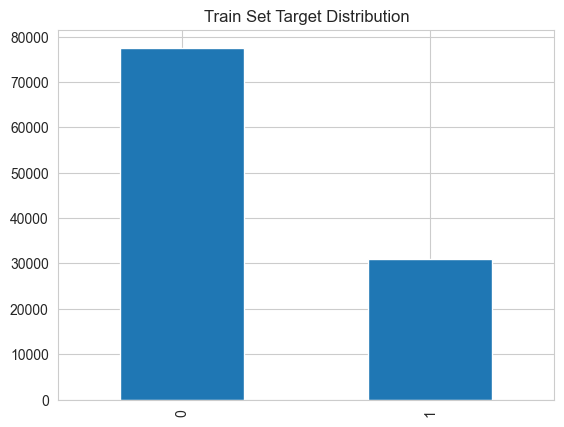

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

print(y_train.value_counts())

sns.set_style("whitegrid")
y_train.value_counts().plot(kind="bar", title="Train Set Target Distribution")
plt.show()

## Handle Target Imbalance

### Use SMOTE (Synthetic Minority Oversampling TEchnique) to balance Train Set target

In [16]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy='minority', random_state=0)
X_train, y_train = oversample.fit_resample(X_train, y_train)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(155162, 54) (155162,) (27139, 54) (27139,)


Check Train Set Target distribution after resampling

0    77581
1    77581
Name: Live birth occurrence, dtype: int64


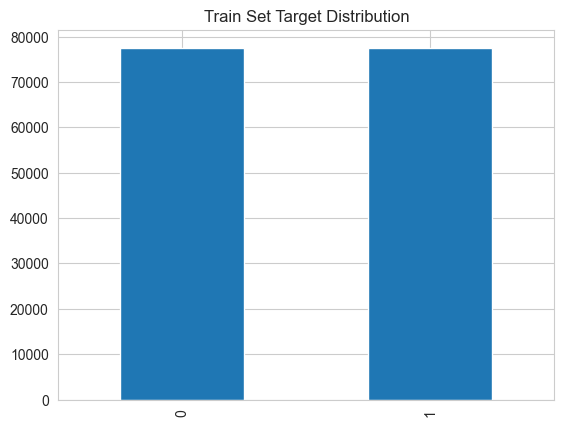

In [17]:
import matplotlib.pyplot as plt

print(y_train.value_counts())

y_train.value_counts().plot(kind='bar', title='Train Set Target Distribution')
plt.show()

## Grid Search CV - Sklearn

### Use standard hyperparameters to find most suitable algorithm 

Set Up the Models and Parameters

In [18]:
models_quick_search = {
    "LogisticRegression": LogisticRegression(random_state=0),
    "XGBClassifier": XGBClassifier(random_state=0),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=0),
    "RandomForestClassifier": RandomForestClassifier(random_state=0),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=0),
    "ExtraTreesClassifier": ExtraTreesClassifier(random_state=0),
    "AdaBoostClassifier": AdaBoostClassifier(random_state=0),
    "XGBLogitBoost": XGBClassifier(objective="binary:logistic", random_state=0)
}

params_quick_search = {
    "LogisticRegression": {},
    "XGBClassifier": {},
    "DecisionTreeClassifier": {},
    "RandomForestClassifier": {},
    "GradientBoostingClassifier": {},
    "ExtraTreesClassifier": {},
    "AdaBoostClassifier": {},
    "XGBLogitBoost": {}
}

Define the custom scoring metrics

In [19]:
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef, confusion_matrix

def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

def npv_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fn)

# Dictionary of all the metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score, pos_label=0),
    'specificity': make_scorer(specificity_score),
    'precision': make_scorer(precision_score, pos_label=1),
    'npv': make_scorer(npv_score),
    'mcc': make_scorer(matthews_corrcoef),
    'f1': make_scorer(f1_score, pos_label=1)
}

Quick GridSearch CV - Binary Classifier

In [20]:
search = HyperparameterOptimizationSearch(models=models_quick_search, params=params_quick_search)

search.fit(X_train, y_train, cv=5, n_jobs=-1, scoring=scoring, refit='f1')


Running GridSearchCV for LogisticRegression with 0 parameter combinations.

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/patriciahalley/Documents/Code_institute/git/ivf-success-predictor/venv-311/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Running GridSearchCV for XGBClassifier with 0 parameter combinations.

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for DecisionTreeClassifier with 0 parameter combinations.

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for RandomForestClassifier with 0 parameter combinations.

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for GradientBoostingClassifier with 0 parameter combinations.

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for ExtraTreesClassifier with 0 parameter combinations.

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for AdaBoostClassifier with 0 parameter combinations.

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/patriciahalley/Documents/Code_institute/git/ivf-success-predictor/venv-311/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/patriciahalley/Documents/Code_institute/git/ivf-success-predictor/venv-311/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/patriciahalley/Documents/Code_institute/git/ivf-success-predictor/venv-311/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/patriciahalley/Documents/Code_institute/git/ivf-


Running GridSearchCV for XGBLogitBoost with 0 parameter combinations.

Fitting 5 folds for each of 1 candidates, totalling 5 fits


Check results

In [21]:
# Get the results and sort by the F1 score
grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='f1', scoring=scoring)
grid_search_summary


,estimator,mean_accuracy,mean_recall,mean_specificity,mean_precision,mean_npv,mean_mcc,mean_f1
4,GradientBoostingClassifier,0.691433,0.577177,0.577177,0.653344,0.767963,0.401468,0.718939
3,RandomForestClassifier,0.709576,0.657519,0.657519,0.684067,0.759071,0.430951,0.715586
5,ExtraTreesClassifier,0.709608,0.667702,0.667702,0.689196,0.748849,0.428513,0.714189
6,AdaBoostClassifier,0.674850,0.548613,0.548613,0.637946,0.746877,0.366716,0.708743
2,DecisionTreeClassifier,0.700778,0.666271,0.666271,0.682065,0.736550,0.409991,0.702664
0,LogisticRegression,0.637321,0.416326,0.416326,0.594905,0.752200,0.308616,0.702398
1,XGBClassifier,0.700469,0.665704,0.665704,0.680960,0.743436,0.412495,0.699711
7,XGBLogitBoost,0.700469,0.665704,0.665704,0.680960,0.743436,0.412495,0.699711


### Perform extensive and comprehensive search on the most suitable algorithm to find the best hyperparameter configuration using GridSearchCV

Define model and parameters, for Extensive Search

In [22]:
models_search = {
    'GradientBoostingClassifier': GradientBoostingClassifier (),
    'RandomForestClassifier': RandomForestClassifier (),
}

params_search = {
    'GradientBoostingClassifier': {
        'model__n_estimators': [100, 200, 300],
        'model__learning_rate': [0.01, 0.05, 0.1],
        'model__max_depth': [3, 4, 5],
        'model__subsample': [0.8, 0.9, 1.0],
        'model__min_samples_split': [2, 5, 10],
        'model__max_features': [None, 'sqrt', 'log2']
    },
    'RandomForestClassifier': {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [5, 10, 15],
        'model__bootstrap': [True, False],
        'model__min_samples_leaf': [5, 10, 20],
        'model__max_features': ['sqrt', 'log2', 0.75],
        'model__class_weight': [{0: 1, 1: 2}, {0: 1, 1: 5}, 'balanced']
    }
}

Extensive GridSearch CV - Binary Classifier

In [23]:
print(y_train.value_counts())

search = HyperparameterOptimizationSearch(models=models_search, params=params_search)
search.fit(X_train, y_train, cv=5, n_jobs=-1, scoring=scoring, refit='f1')

0    77581
1    77581
Name: Live birth occurrence, dtype: int64

Running GridSearchCV for GradientBoostingClassifier with 6 parameter combinations.

Fitting 5 folds for each of 729 candidates, totalling 3645 fits

Running GridSearchCV for RandomForestClassifier with 6 parameter combinations.

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


/Users/patriciahalley/Documents/Code_institute/git/ivf-success-predictor/venv-311/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Check results

In [ ]:
grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='f1', scoring=scoring)
grid_search_summary 

Get best model name programmatically

In [ ]:
best_model = grid_search_summary.iloc[0,0]
best_model

Parameters for best model

In [ ]:
best_parameters = grid_search_pipelines[best_model].best_params_
best_parameters

Define the best clf pipeline

In [ ]:
pipeline_clf = grid_search_pipelines[best_model].best_estimator_
pipeline_clf

## Assess feature importance

In [ ]:
X_train.head(3)

Assess feature importance on the current model with `.features_importances_`

In [ ]:
# create DataFrame to display feature importance
df_feature_importance = pd.DataFrame(
    data={
        "Feature": X_train.columns[pipeline_clf["feat_selection"].get_support()],
        "Importance": pipeline_clf["model"].feature_importances_,
    }
).sort_values(by="Importance", ascending=False)

# re-assign best_features order
best_features = df_feature_importance["Feature"].to_list()

# Most important features statement and plot
print(
    f"* These are the {len(best_features)} most important features in descending order. "
    f"The model was trained on them: \n{df_feature_importance['Feature'].to_list()}"
)

df_feature_importance.plot(kind="bar", x="Feature", y="Importance")
plt.show()

## Evaluate Pipeline on Train and Test Sets

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

def confusion_matrix_and_report(X, y, pipeline, label_map):
    # Make predictions using the pipeline
    prediction = pipeline.predict(X)

    print("---  Confusion Matrix  ---")
    print(
        pd.DataFrame(
            confusion_matrix(y_true=y, y_pred=prediction),
            columns=["Actual " + label for label in label_map],
            index=["Prediction " + label for label in label_map]
        )
    )
    print("\n")

    # Print classification report
    print("---  Classification Report  ---")
    print(classification_report(y, prediction, target_names=label_map), "\n")

def clf_performance(X_train, y_train, X_test, y_test, pipeline, label_map):
    # Evaluate performance on the training set
    print("#### Train Set #### \n")
    confusion_matrix_and_report(X_train, y_train, pipeline, label_map)

    # Evaluate performance on the test set
    print("#### Test Set ####\n")
    confusion_matrix_and_report(X_test, y_test, pipeline, label_map)


Evaluation:

In [ ]:
clf_performance(X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test,
                pipeline=pipeline_clf,
                label_map= ['No Success', 'Success'] 
                )

---

## Refit pipeline with best features

### Refit ML Pipeline and Resampling

### Rewrite ML pipeline for Data Cleaning and Feature Engineering

In [ ]:
best_features 

#### Reassign best features names

One hot encoding create new columns and appends the value after the name as `_<value>`.
Therefore it is necessary to rename the features to the original name, so when the pipeline is excecuted, it will find the correct columns on the dataframe.

In [ ]:
import re

def reassign_best_features(features):
    """
    Reassigns encoded feature names to their original names by removing any suffixes added by one-hot encoding.
    """
    # Use regex to remove the "_<value>" suffix from feature names
    reassigned_best_features = [re.sub(r'_[^_]+$', '', feature) for feature in features]
    # Filter out duplicate values from the reassigned features list
    unique_reassigned_best_features = list(set(reassigned_best_features))

    return unique_reassigned_best_features

reassigned_best_features = reassign_best_features(best_features)
reassigned_best_features


### Split Train Test Set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Live birth occurrence'], axis=1),
    df['Live birth occurrence'],
    test_size=0.2,
    random_state=0,
)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

New Pipeline for Feature Engineering considering only the best features and without Smart Correlation (manually entered).

In [ ]:
from sklearn.pipeline import Pipeline
from feature_engine.encoding import OneHotEncoder
from src.custom_transformers import OrdinalEncoderWithCategories


# Define the correct order for each feature
categories = [
    ['18-34', '35-37', '38-39', '40-42', '43-44', '45-50'],  # Patient age at treatment
    ['0', '1', '2', '3', '4', '5', '>5'],                    # Total number of previous IVF cycles
    ['18-34', '35-37', '38-39', '40-42', '43-44', '45-50'],  # Patient/Egg provider age
    ['18-34', '35-37', '38-39', '40-42', '43-44', '45-50', '51-55', '56-60', '>60'],  # Partner/Sperm provider age
    ['0', '0 - frozen cycle', '1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '>40'], # Total eggs mixed
    ['0', '1', '1e', '2', '3'],  # Embryos transferred
    ['0 - fresh cycle', '0 - frozen cycle', '1-5', '6-10', '>10']  # Total embryos thawed
]

# Define columns that need ordinal encoding
ordinal_columns = [
    'Patient age at treatment',
    'Total number of previous IVF cycles',
    'Patient/Egg provider age',
    'Partner/Sperm provider age',
    'Total eggs mixed',
    'Embryos transferred',
]


def PreprocessingPipeline():
    pipeline_base = Pipeline(
        [   
            ('ordinal_encoding', OrdinalEncoderWithCategories(
                categories=categories,
                columns=ordinal_columns
                )
            ),
            (
                "one_hot_encoding",
                OneHotEncoder(
                    variables=[
                        "Date of embryo transfer"
                    ],
                ),
            ),
            # No need for smart correlation, since best features are already selected
        ]
    )

    return pipeline_base


pipeline_pre_processing = PreprocessingPipeline()
pipeline_pre_processing

### Rewrite ML Pipeline for Modelling

Function for Pipeline optmisation

In [ ]:
# Pipeline Optmization: Model
def PipelineClf(model):
    pipeline_base = Pipeline([
        ("scaler", StandardScaler()),
        # no feature selection needed anymore since it is already known which features to use
        ("model", model),
    ])

    return pipeline_base


Filter only the most important variables

In [ ]:
# Apply the data cleaning and feature engineering pipeline
X_train = pipeline_pre_processing.fit_transform(X_train)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
X_train.head(3)

Apply the data cleaning and feature engineering pipeline

Apply the pipeline to the test set

In [ ]:
X_test = pipeline_pre_processing.transform(X_test)

Check Train Set Target distribution

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print(y_train.value_counts())

sns.set_style("whitegrid")
y_train.value_counts().plot(kind="bar", title="Train Set Target Distribution")
plt.show()

### Handle Target Imbalance

Use SMOTE to balance Train Set target

In [ ]:
print("Data types of transformed X_train:")
print(X_train.dtypes)
print(X_train.head(3))

In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy='minority', random_state=0)
X_train, y_train = oversample.fit_resample(X_train, y_train)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Check Train Set Target distribution after SMOTE

In [ ]:
y_train.value_counts().plot(kind='bar',title='Train Set Target Distribution')
plt.show()

### Grid Search CV: Sklearn

Using the most suitable model from the last section and its best hyperparameter configuration.

We are using the same model from  the last GridCV search

In [ ]:
models_search 

And the best parameters from the last GridCV search 

In [ ]:
best_parameters

Manually type in the hyperparameter values have to be a list.

In [ ]:
params_search = {
    'GradientBoostingClassifier': {
        'model__learning_rate': [0.01],
        'model__max_depth': [3],
        'model__min_samples_leaf': [2],
        'model__min_samples_split': [2],
        'model__max_features': ['sqrt'],
        'model__subsample': [1.0],
        'model__n_estimators': [200]
    },
    'RandomForestClassifier': {
        'model__n_estimators': [100],
        'model__max_depth': [20],
        'model__min_samples_split': [2],
        'model__min_samples_leaf': [1],
        'model__max_features': [0.5],
        'model__bootstrap': [True]
    }
}
params_search

GridSearch CV

In [ ]:
search = HyperparameterOptimizationSearch(models=models_search, params=params_search)
search.fit(X_train, y_train, cv=5, n_jobs=-1, scoring=scoring, refit="f1")

Check results

In [ ]:
grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='f1', scoring=scoring)
grid_search_summary

Define the best clf pipeline

In [ ]:
best_model = grid_search_summary.iloc[0, 0]
pipeline_clf = grid_search_pipelines[best_model].best_estimator_
pipeline_clf

### Assess feature importance

In [ ]:

# create DataFrame to display feature importance
df_feature_importance = (pd.DataFrame(data={
    'Feature': new_best_features,
    'Importance': pipeline_clf['model'].feature_importances_})
    .sort_values(by='Importance', ascending=False)
)


# Most important features statement and plot
print(f"* These are the {len(new_best_features)} most important features in descending order. "
      f"The model was trained on them: \n{df_feature_importance['Feature'].to_list()}")

df_feature_importance.plot(kind='bar', x='Feature', y='Importance')
plt.show()


In [ ]:
new_best_features = X_train.columns
new_best_features


In [ ]:


reassigned_new_best_features = reassign_best_features(new_best_features)
reassigned_new_best_features


### Evaluate Pipeline on Train and Test Sets

Evaluation: We cross-check with metrics defined in the ML business case.
* 70% Recall for No Success, on train and test set.
* 70% Precision for Success on train and test set. 

In [ ]:
clf_performance(X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test,
                pipeline=pipeline_clf,
                label_map= ['No Success', 'Success'] 
                )

## Push files to Repo

Generate the following files
* Train set
* Test set
* Data cleaning and Feature Engineering pipeline
* Modeling pipeline
* features importance plot

In [ ]:
import joblib
import os

version = 'v1'
file_path = f'outputs/ml_pipeline/ivf_success_predictor/{version}'

try:
    # Check if the directories exist
    if os.path.exists(file_path):
        print('Old version is already available. Please create a new version.')
    else:
        # Create the directory if it does not exist
        os.makedirs(name=file_path)
        print(f"Directory {file_path} created successfully.")
except Exception as e:
    print(f"An error occurred: {e}")

### Train Set

* note that the variables **are transformed already** in X_train after SMOTE was applied.

In [ ]:
print(X_train.shape)
X_train.head()

In [ ]:
X_train.to_csv(f"{file_path}/X_train.csv", index=False)

In [ ]:
y_train

In [ ]:
y_train.to_csv(f"{file_path}/y_train.csv", index=False)

### Test Set

* note that the variables are transformed already in X_test

In [ ]:
print(X_test.shape)
X_test.head()

In [ ]:
X_test.to_csv(f"{file_path}/X_test.csv", index=False)

In [ ]:
y_test

In [ ]:
y_test.to_csv(f"{file_path}/y_test.csv", index=False)

#### Save Best features (to be used for generating the widgets on the live predition page)

In [ ]:
reassigned_best_features

In [ ]:
# Create a DataFrame
reassigned_best_features_df = pd.DataFrame(reassigned_best_features, columns=['feature']) 

reassigned_best_features_df = reassigned_best_features_df.drop_duplicates()

reassigned_best_features_df.to_csv(f'{file_path}/best_features.csv', index=False)

print(f"Best features saved to {file_path}/best_features.csv")

### ML Pipelines: Data Cleaning and Feat Eng pipeline and Modelling Pipeline

Both pipelines should be used in conjunction to predict Live Data.

* To predict on Train Set, Test Set we use only pipeline_clf, since the data is already processed.

Pipeline responsible for Data Cleaning and Feature Engineering.

In [ ]:
pipeline_pre_processing

In [ ]:
joblib.dump(value=pipeline_pre_processing ,
            filename=f"{file_path}/clf_pipeline_pre_processing.pkl")

  Pipeline responsible for Feature Scaling, and Model

In [ ]:
pipeline_clf

### Save the model as pkl compressed

In [ ]:
import joblib
import gzip

# Save the model directly into a compressed gzip file
with gzip.open(f"{file_path}/clf_pipeline_model.pkl.gz", 'wb') as f_out:
    joblib.dump(pipeline_clf, f_out)

print(f"Model compressed and saved at: {file_path}/clf_pipeline_model.pkl.gz")

### Feature Importance plot

In [ ]:
df_feature_importance.plot(kind='bar',x='Feature',y='Importance')
plt.show()

In [ ]:
df_feature_importance.plot(kind='bar', x='Feature', y='Importance')
plt.savefig(f'{file_path}/features_importance.png', bbox_inches='tight')

---